In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("../Data/tmy_36.927_-2.374_2005_2020_cleaned.csv")    

In [12]:
df.head()

,time(UTC),T2m,RH,G(h),Gb(n),Gd(h),IR(h),WS10m,WD10m,SP
0,20180101:0000,10.52,71.00,0.0,-0.0,0.0,284.82,1.98,303.0,99628.0
1,20180101:0100,10.09,71.37,0.0,-0.0,0.0,280.87,1.93,318.0,99686.0
2,20180101:0200,9.66,71.74,0.0,-0.0,0.0,276.93,1.87,340.0,99725.0
3,20180101:0300,9.23,72.11,0.0,-0.0,0.0,272.99,1.81,356.0,99783.0
4,20180101:0400,8.81,72.48,0.0,-0.0,0.0,269.05,1.76,6.0,99841.0


In [13]:
df.describe()

,T2m,RH,G(h),Gb(n),Gd(h),IR(h),WS10m,WD10m,SP
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,17.408083,61.588756,225.917009,273.540935,61.895205,318.126029,2.683718,174.414612,98560.471575
std,6.865209,18.171547,309.343092,350.969707,81.192045,37.480655,1.424444,107.148354,580.678826
min,-1.040000,12.050000,0.000000,-0.000000,0.000000,193.200000,-0.470000,0.000000,96470.000000
25%,11.920000,46.950000,0.000000,-0.000000,0.000000,289.600000,1.670000,63.000000,98175.000000
50%,17.840000,62.850000,0.000000,-0.000000,0.000000,320.000000,2.350000,201.000000,98504.000000
75%,22.652500,76.500000,441.000000,658.915000,117.000000,346.400000,3.520000,261.000000,98969.000000
max,34.090000,100.000000,1055.000000,1047.180000,471.000000,418.450000,9.790000,360.000000,100287.000000


In [14]:
# Check the data types
df.dtypes

time(UTC)     object
T2m          float64
RH           float64
G(h)         float64
Gb(n)        float64
Gd(h)        float64
IR(h)        float64
WS10m        float64
WD10m        float64
SP           float64
dtype: object

In [15]:

# Convert the time column to datetime
df['time(UTC)'] = pd.to_datetime(df['time(UTC)'], format='%Y%m%d:%H%M')
#df['time(UTC)'] = df['time(UTC)'].dt.strftime('%m%d:%H%M')

<Axes: xlabel='time(UTC)'>

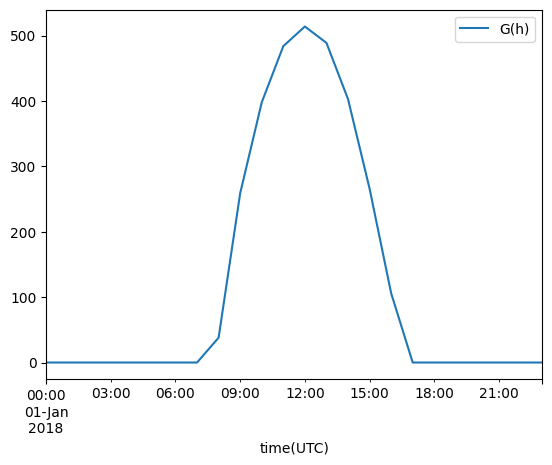

In [16]:

df[:24].plot(x='time(UTC)', y='G(h)', kind='line')

# Data visualization

## Features:

T2m: 2-m air temperature (degree Celsius)
RH: relative humidity (%)
G(h): Global irradiance on the horizontal plane (W/m2)
Gb(n): Beam/direct irradiance on a plane always normal to sun rays (W/m2)
Gd(h): Diffuse irradiance on the horizontal plane (W/m2)
IR(h): Surface infrared (thermal) irradiance on a horizontal plane (W/m2)
WS10m: 10-m total wind speed (m/s)
WD10m: 10-m wind direction (0 = N, 90 = E) (degree)
SP: Surface (air) pressure (Pa)

PVGIS (c) European Union, 2001-2024

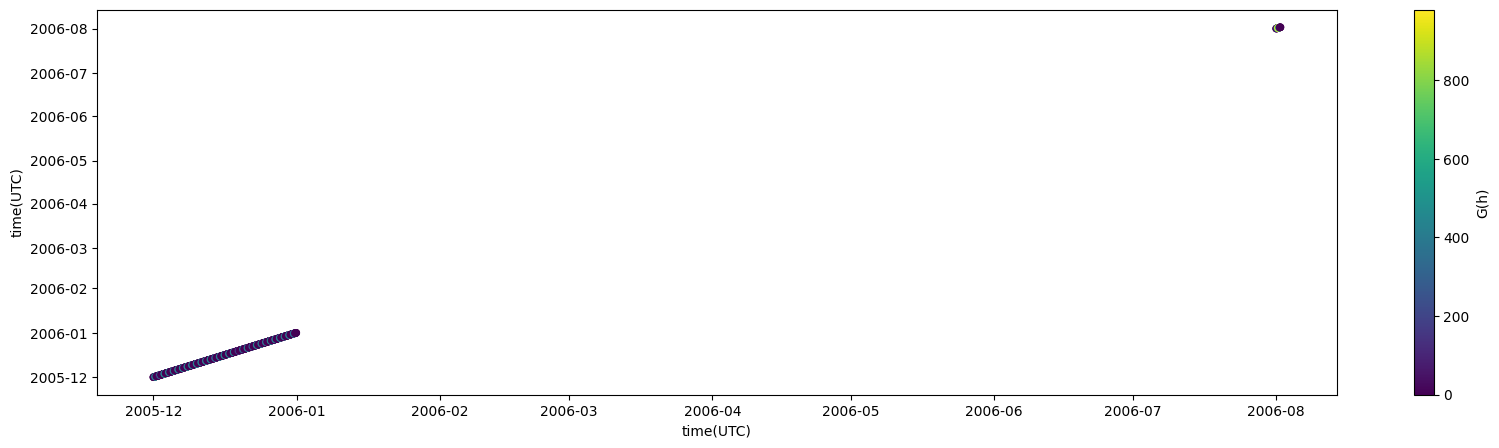

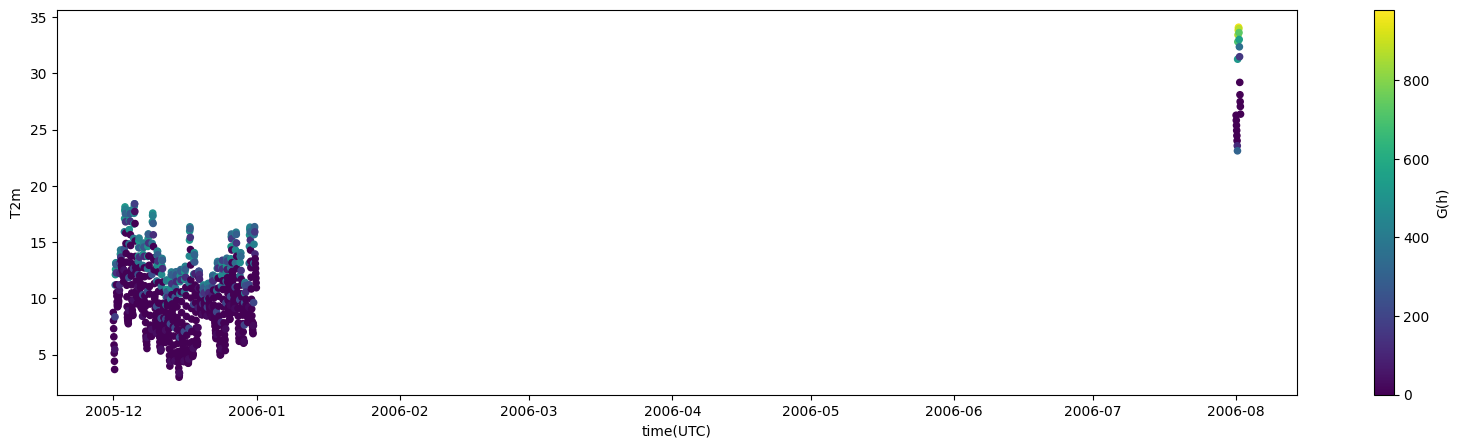

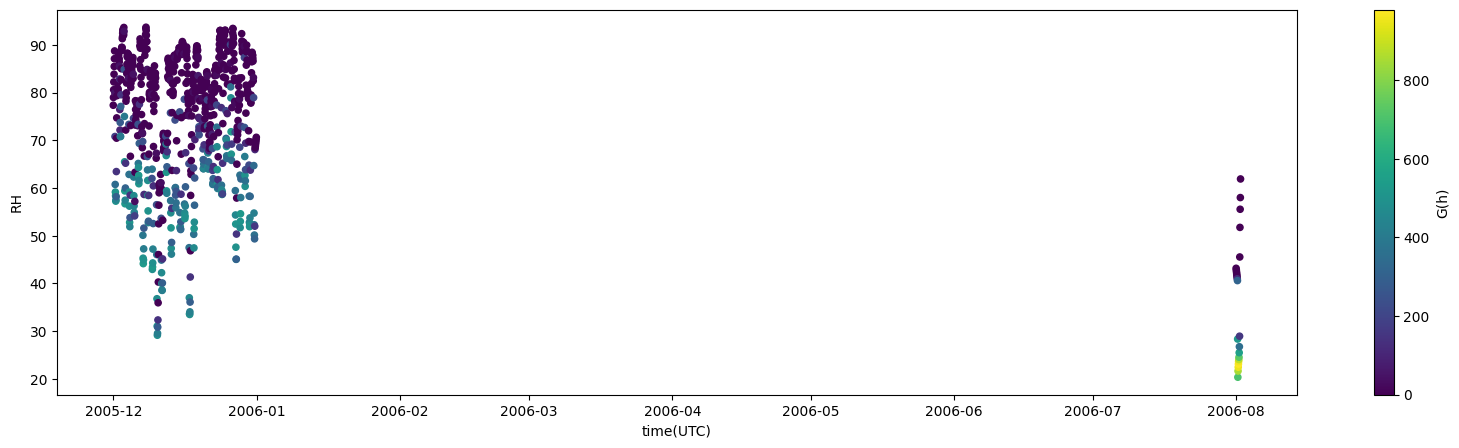

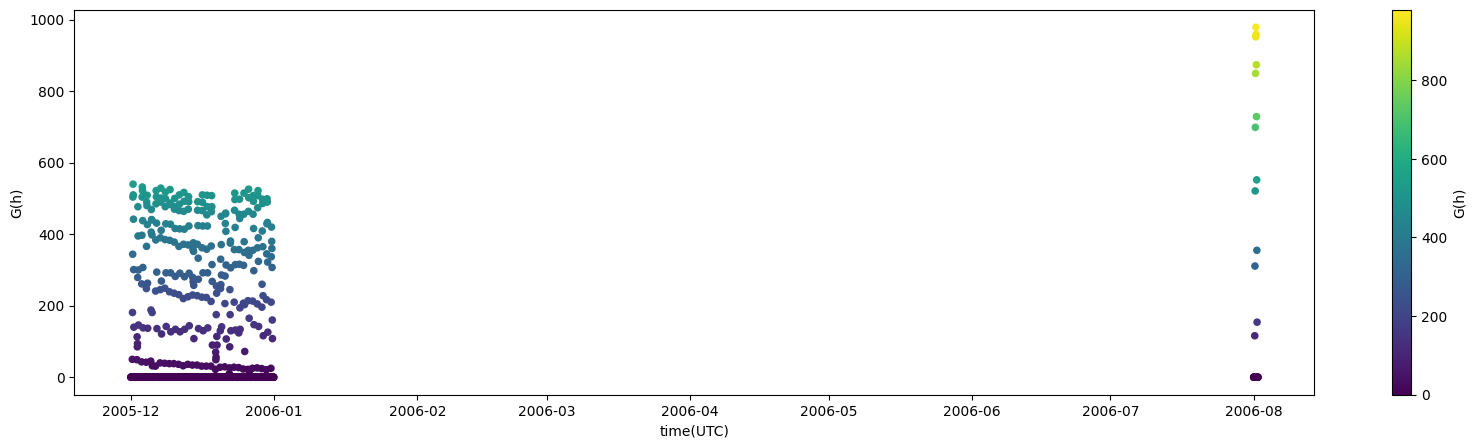

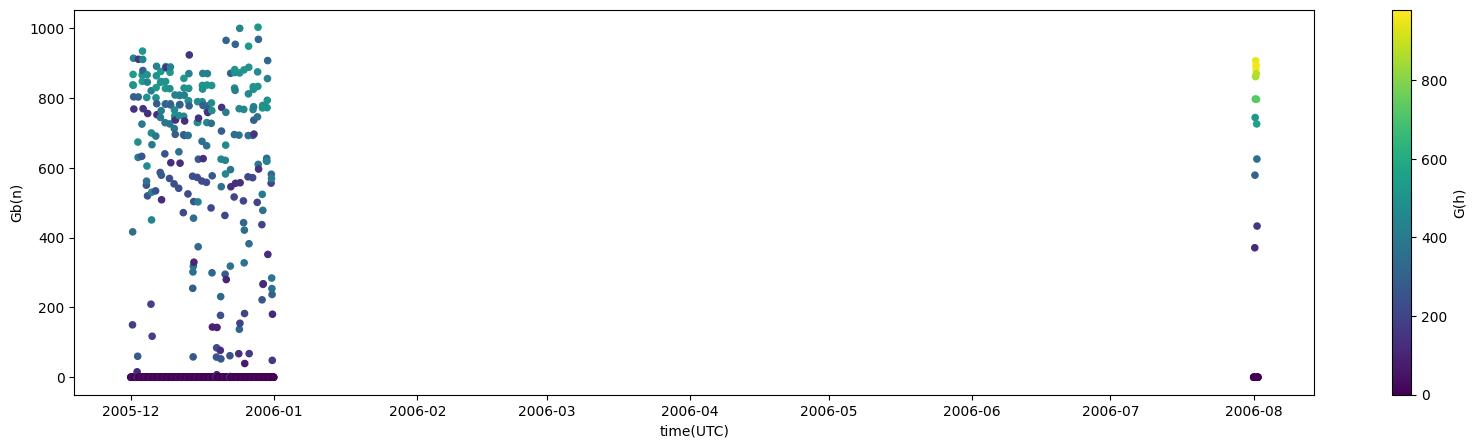

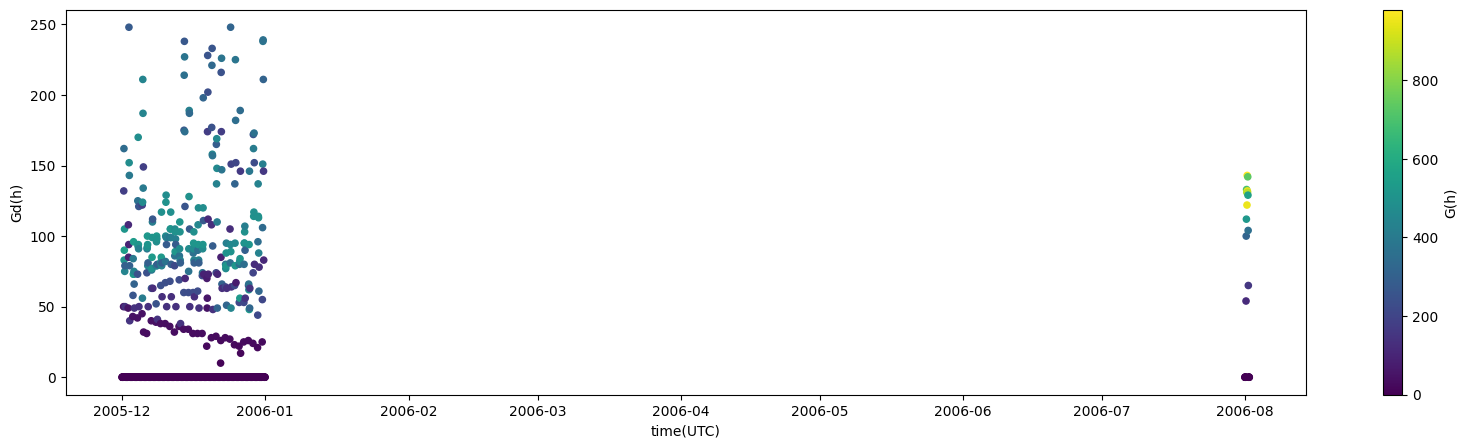

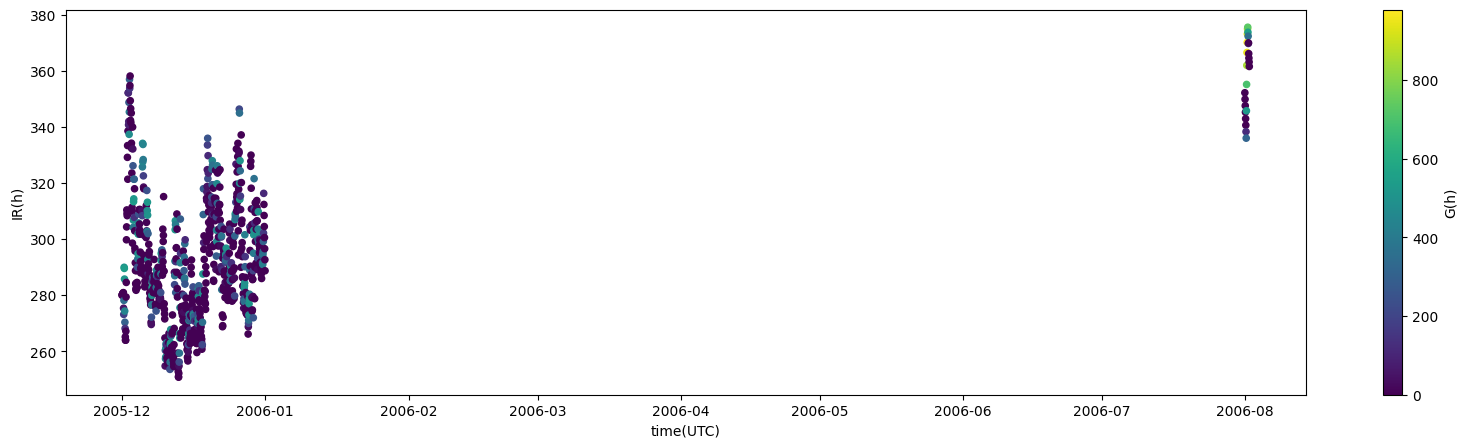

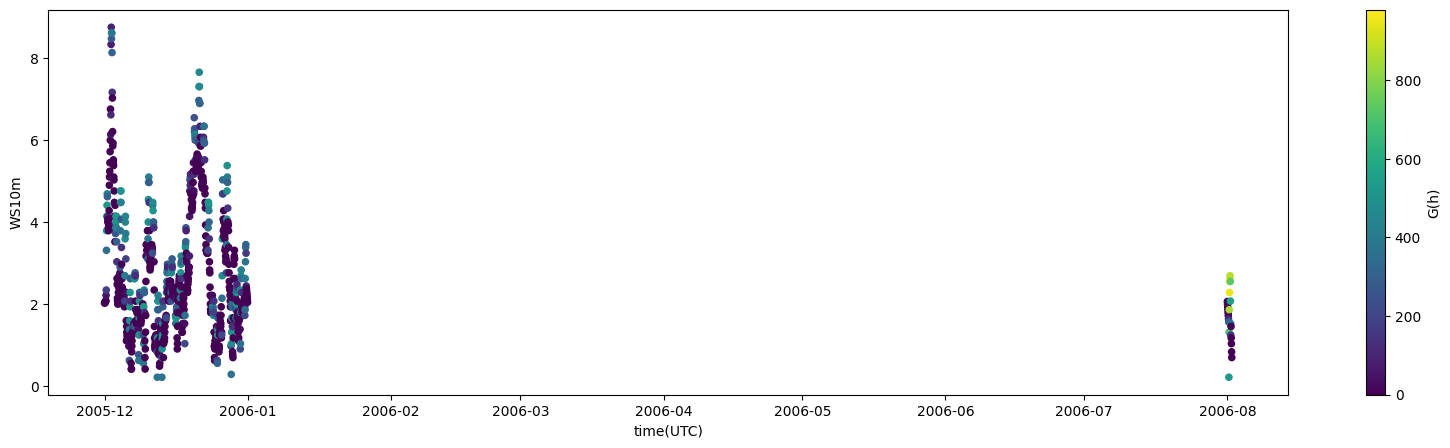

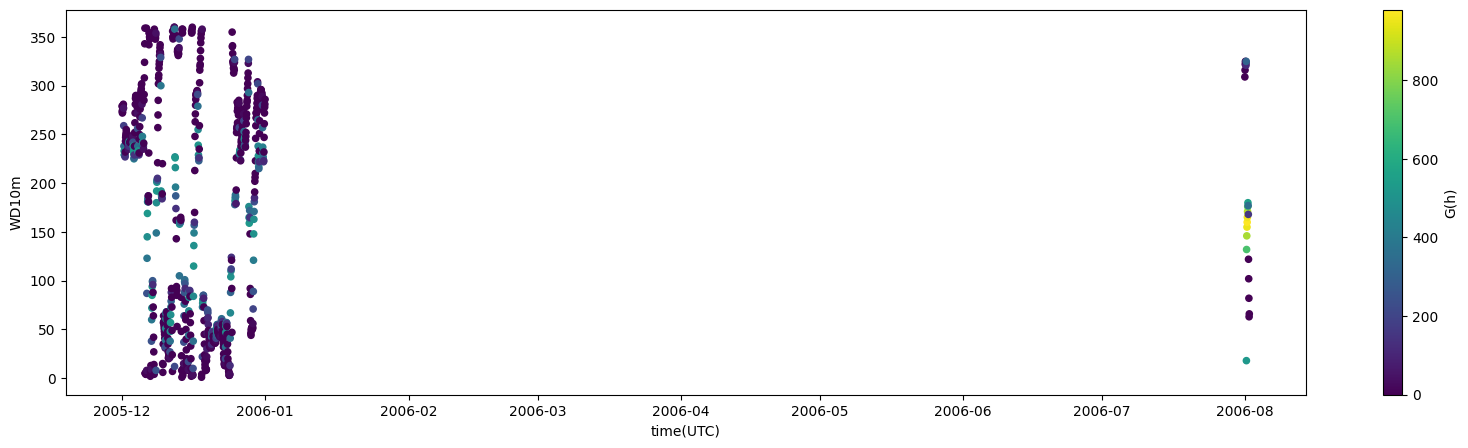

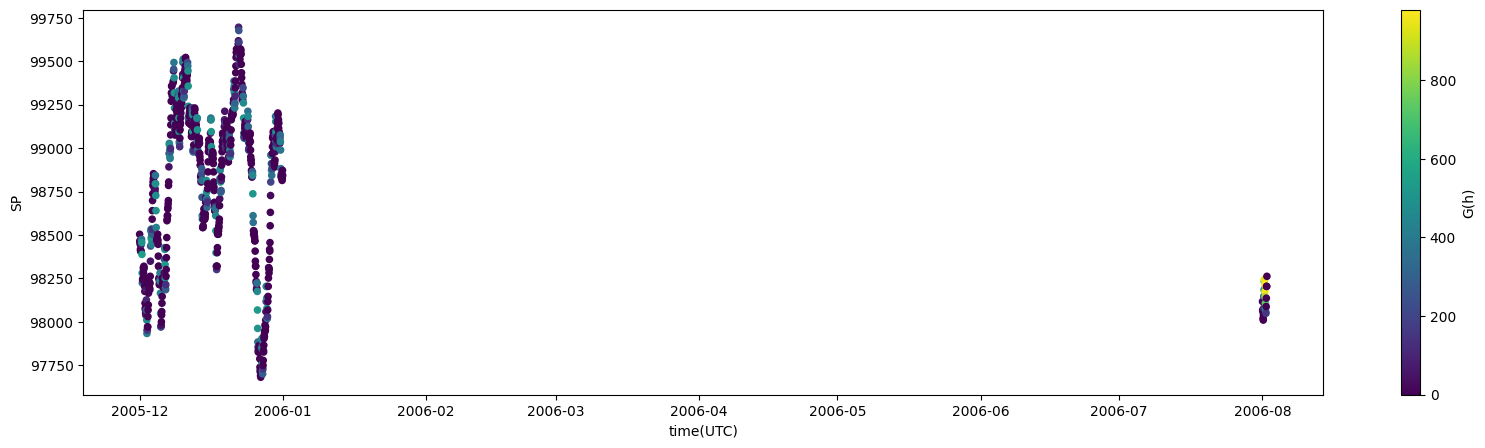

In [19]:
df.sort_values(by='time(UTC)', inplace=True)
cols = df.columns

end = 24 * 32

for col in cols: 
    df[:end].plot.scatter(x = "time(UTC)", y=col, c='G(h)', colormap='viridis', figsize=(20, 5))

<Axes: >

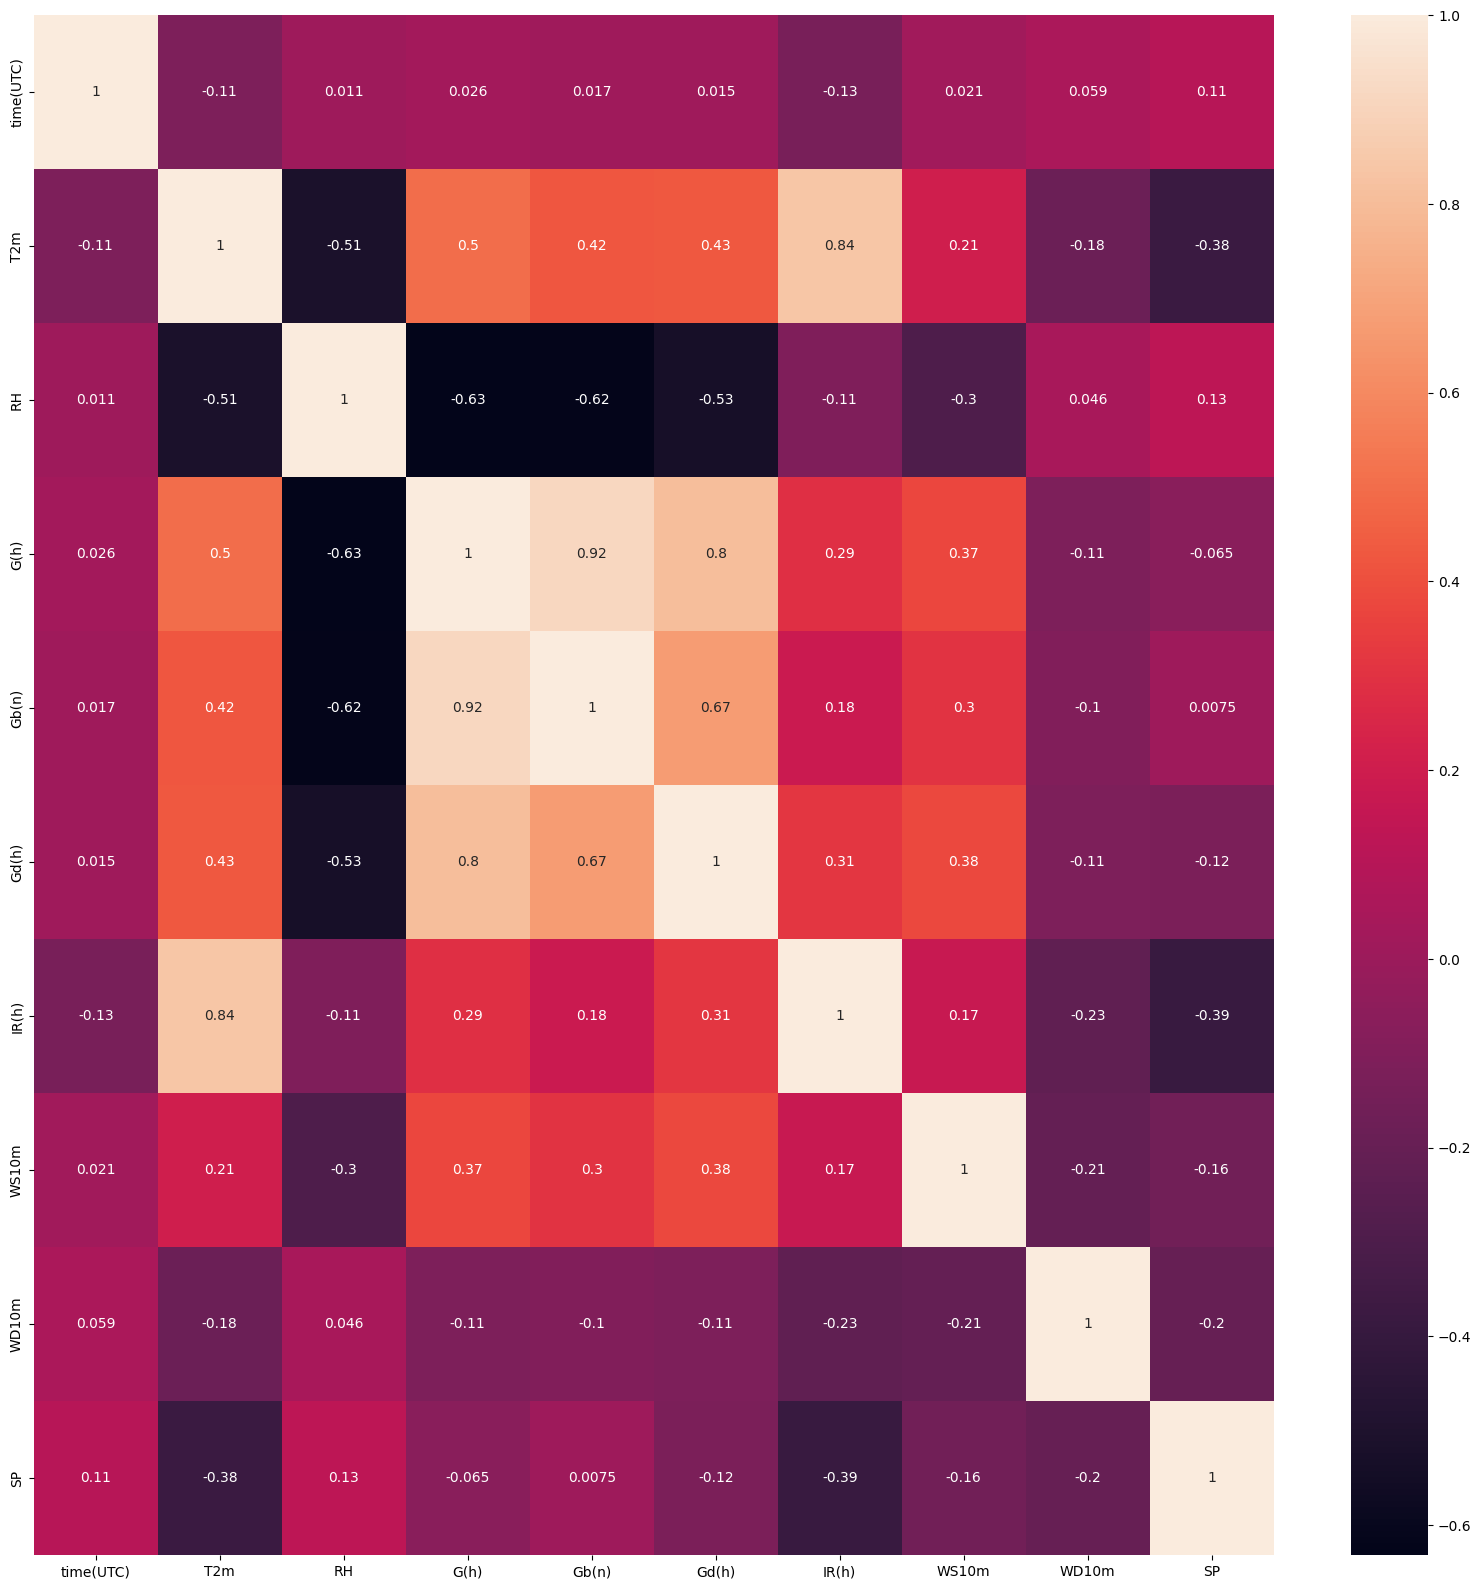

In [18]:
# Correlation matrix
corr = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)


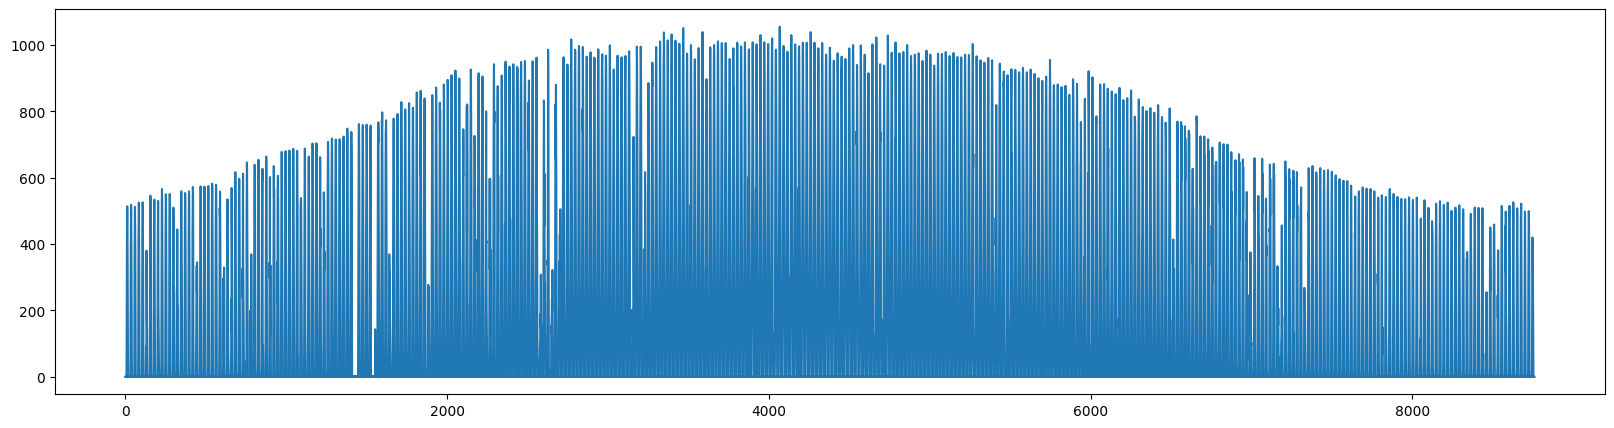

In [30]:
days = 365

plt.figure(figsize=(20, 5))
plt.plot(df["G(h)"][:24*days])
